In [1]:
!unzip weatherAUS.zip

Archive:  weatherAUS.zip
   creating: weatherAUS/
  inflating: weatherAUS/Townsville.csv  
  inflating: weatherAUS/PerthAirport.csv  
  inflating: weatherAUS/MountGinini.csv  
  inflating: weatherAUS/WaggaWagga.csv  
  inflating: weatherAUS/Williamtown.csv  
  inflating: weatherAUS/Katherine.csv  
  inflating: weatherAUS/Bendigo.csv  
  inflating: weatherAUS/Uluru.csv    
  inflating: weatherAUS/PearceRAAF.csv  
  inflating: weatherAUS/NorahHead.csv  
  inflating: weatherAUS/Dartmoor.csv  
  inflating: weatherAUS/Walpole.csv  
  inflating: weatherAUS/Newcastle.csv  
  inflating: weatherAUS/Nuriootpa.csv  
  inflating: weatherAUS/Woomera.csv  
  inflating: weatherAUS/Melbourne.csv  
  inflating: weatherAUS/BadgerysCreek.csv  
  inflating: weatherAUS/Cairns.csv   
  inflating: weatherAUS/Tuggeranong.csv  
  inflating: weatherAUS/SalmonGums.csv  
  inflating: weatherAUS/Perth.csv    
  inflating: weatherAUS/Darwin.csv   
  inflating: weatherAUS/Moree.csv    
  inflating: weatherAUS/Richmo

In [2]:
import pandas as pd
import os

def standardize_column_names(df):
    df.columns = df.columns.str.lower()
    df.columns = df.columns.str.replace(' ', '')
    df.columns = df.columns.str.replace('_', '')
    df.columns = df.columns.str.replace('.', '')
    return df

def merge_excel_files(directory):
    merged_df = pd.DataFrame()

    for filename in os.listdir(directory):
        if filename.endswith(".csv"):
            df = pd.read_csv(os.path.join(directory, filename))

            df = standardize_column_names(df)

            merged_df = pd.concat([merged_df, df], ignore_index=True)

    return merged_df

merged_df = merge_excel_files('weatherAUS/')
merged_df.to_excel("combined_data.xlsx",index=False)


<ipython-input-2-d0a4871e8ca3>:8: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df.columns = df.columns.str.replace('.', '')
<ipython-input-2-d0a4871e8ca3>:8: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df.columns = df.columns.str.replace('.', '')
<ipython-input-2-d0a4871e8ca3>:8: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df.columns = df.columns.str.replace('.', '')
<ipython-input-2-d0a4871e8ca3>:8: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single cha

In [3]:
merged_df.head(5)

,location,rainfall,temp3pmf,winddir9am,windspeed3pm,windgustdir,pressure3pm,humidity9am,raintoday,winddir3pm,...,windgustspeed,raintomorrow,maxtempc,sunshine,cloud3pm,evaporation,mintempc,temp3pmc,cloud9am,temp9amc
0,GoldCoast,0.0,83.30,NNW,22.0,NNW,1010.7,52.0,No,NE,...,31.0,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,GoldCoast,0.0,79.16,NNW,31.0,NNE,1010.2,55.0,No,NNE,...,37.0,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,GoldCoast,0.0,76.28,N,31.0,NNE,1009.8,61.0,No,N,...,52.0,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,GoldCoast,0.8,74.48,ENE,39.0,SE,1014.5,65.0,No,SE,...,52.0,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,GoldCoast,0.2,74.84,E,11.0,NW,1015.2,67.0,No,SE,...,43.0,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
print(merged_df.dtypes)

location          object
rainfall         float64
temp3pmf         float64
winddir9am        object
windspeed3pm     float64
windgustdir       object
pressure3pm      float64
humidity9am      float64
raintoday         object
winddir3pm        object
maxtempf         float64
humidity3pm      float64
mintempf         float64
pressure9am      float64
date              object
temp9amf         float64
windspeed9am     float64
windgustspeed    float64
raintomorrow      object
maxtempc         float64
sunshine         float64
cloud3pm         float64
evaporation      float64
mintempc         float64
temp3pmc         float64
cloud9am         float64
temp9amc         float64
dtype: object


In [5]:
import pandas as pd


temp_columns = [col for col in merged_df.columns if 'temp' in col]

for col in temp_columns:
    merged_df[col] = merged_df[col].fillna(-99).astype(int)
print(merged_df.dtypes)

location          object
rainfall         float64
temp3pmf           int64
winddir9am        object
windspeed3pm     float64
windgustdir       object
pressure3pm      float64
humidity9am      float64
raintoday         object
winddir3pm        object
maxtempf           int64
humidity3pm      float64
mintempf           int64
pressure9am      float64
date              object
temp9amf           int64
windspeed9am     float64
windgustspeed    float64
raintomorrow      object
maxtempc           int64
sunshine         float64
cloud3pm         float64
evaporation      float64
mintempc           int64
temp3pmc           int64
cloud9am         float64
temp9amc           int64
dtype: object


In [6]:
merged_df.head(5)

,location,rainfall,temp3pmf,winddir9am,windspeed3pm,windgustdir,pressure3pm,humidity9am,raintoday,winddir3pm,...,windgustspeed,raintomorrow,maxtempc,sunshine,cloud3pm,evaporation,mintempc,temp3pmc,cloud9am,temp9amc
0,GoldCoast,0.0,83,NNW,22.0,NNW,1010.7,52.0,No,NE,...,31.0,No,-99,NaN,NaN,NaN,-99,-99,NaN,-99
1,GoldCoast,0.0,79,NNW,31.0,NNE,1010.2,55.0,No,NNE,...,37.0,No,-99,NaN,NaN,NaN,-99,-99,NaN,-99
2,GoldCoast,0.0,76,N,31.0,NNE,1009.8,61.0,No,N,...,52.0,No,-99,NaN,NaN,NaN,-99,-99,NaN,-99
3,GoldCoast,0.8,74,ENE,39.0,SE,1014.5,65.0,No,SE,...,52.0,No,-99,NaN,NaN,NaN,-99,-99,NaN,-99
4,GoldCoast,0.2,74,E,11.0,NW,1015.2,67.0,No,SE,...,43.0,Yes,-99,NaN,NaN,NaN,-99,-99,NaN,-99


In [7]:
import sys

size_in_bytes = sys.getsizeof(merged_df)
size_in_kb = size_in_bytes / 1024
size_in_mb = size_in_kb / 1024

print(f"Size of df in Bytes: {size_in_bytes}")
print(f"Size of df in KB: {size_in_kb}")
print(f"Size of df in MB: {size_in_mb}")


Size of df in Bytes: 84778309
Size of df in KB: 82791.3173828125
Size of df in MB: 80.85089588165283


In [8]:
print(merged_df.dtypes)

location          object
rainfall         float64
temp3pmf           int64
winddir9am        object
windspeed3pm     float64
windgustdir       object
pressure3pm      float64
humidity9am      float64
raintoday         object
winddir3pm        object
maxtempf           int64
humidity3pm      float64
mintempf           int64
pressure9am      float64
date              object
temp9amf           int64
windspeed9am     float64
windgustspeed    float64
raintomorrow      object
maxtempc           int64
sunshine         float64
cloud3pm         float64
evaporation      float64
mintempc           int64
temp3pmc           int64
cloud9am         float64
temp9amc           int64
dtype: object


In [9]:
merged_df['windgustdir'].fillna('Unknown', inplace=True)
merged_df['raintomorrow'].fillna('Unknown', inplace=True)
merged_df['date'].fillna('Unknown', inplace=True)
merged_df['location'].fillna('Unknown', inplace=True)
merged_df['winddir3pm'].fillna('Unknown', inplace=True)
merged_df['raintoday'].fillna('Unknown', inplace=True)
merged_df['winddir9am'].fillna('Unknown',inplace=True)


merged_df['windgustdir'] = merged_df['windgustdir'].astype('category')
merged_df['raintomorrow'] = merged_df['raintomorrow'].astype('category')
merged_df['date'] = merged_df['date'].astype('category')
merged_df['location'] = merged_df['location'].astype('category')
merged_df['winddir3pm'] = merged_df['winddir3pm'].astype('category')
merged_df['raintoday'] = merged_df['raintoday'].astype('category')
merged_df['winddir9am'] = merged_df['winddir9am'].astype('category')

In [10]:
print(merged_df.dtypes)

location         category
rainfall          float64
temp3pmf            int64
winddir9am       category
windspeed3pm      float64
windgustdir      category
pressure3pm       float64
humidity9am       float64
raintoday        category
winddir3pm       category
maxtempf            int64
humidity3pm       float64
mintempf            int64
pressure9am       float64
date             category
temp9amf            int64
windspeed9am      float64
windgustspeed     float64
raintomorrow     category
maxtempc            int64
sunshine          float64
cloud3pm          float64
evaporation       float64
mintempc            int64
temp3pmc            int64
cloud9am          float64
temp9amc            int64
dtype: object


In [11]:
import sys

size_in_bytes = sys.getsizeof(merged_df)
size_in_kb = size_in_bytes / 1024
size_in_mb = size_in_kb / 1024

print(f"Size of df in Bytes: {size_in_bytes}")
print(f"Size of df in KB: {size_in_kb}")
print(f"Size of df in MB: {size_in_mb}")

Size of df in Bytes: 24809347
Size of df in KB: 24227.8779296875
Size of df in MB: 23.66003704071045


In [12]:
import numpy as np

def count_missing_values(column):
    if column.dtype == np.number or column.dtype == np.int64 or column.dtype == np.float64:
        return sum(column == -99 ) + column.isnull().sum()
    else:
        return sum(column == 'Unknown') + column.isnull().sum()

missing_values_count = merged_df.apply(count_missing_values)
print(missing_values_count)

<ipython-input-12-0c4daf7e9541>:4: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  if column.dtype == np.number or column.dtype == np.int64 or column.dtype == np.float64:


location             0
rainfall          3261
temp3pmf         61183
winddir9am       10566
windspeed3pm      3062
windgustdir      10326
pressure3pm      15028
humidity9am       2654
raintoday         3261
winddir3pm        4228
maxtempf         59527
humidity3pm       4507
mintempf         59713
pressure9am      15065
date                 0
temp9amf         59976
windspeed9am      1767
windgustspeed    10263
raintomorrow      3267
maxtempc         87194
sunshine         69835
cloud3pm         59358
evaporation      62790
mintempc         87232
temp3pmc         87886
cloud9am         55888
temp9amc         87251
dtype: int64


In [13]:
print(len(merged_df))

145460


In [14]:
def count_missing_values(row):
    if row.dtype == np.number or row.dtype == np.int64 or row.dtype == np.float64:
        return sum(row == -99) + row.isnull().sum()
    else:
        return sum(row == 'Unknown') + row.isnull().sum()

missing_values_count_row = merged_df.apply(count_missing_values, axis=1)

filled_df = merged_df[missing_values_count_row <= 10]

<ipython-input-14-8ba0236c03b1>:2: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  if row.dtype == np.number or row.dtype == np.int64 or row.dtype == np.float64:


In [15]:
print(len(filled_df))

143776


In [16]:
def fahrenheit_to_celsius(value):
    if value != -99:
        return (value - 32) * 5.0/9.0
    else:
        return value

temp_columns = filled_df.filter(regex='temp.*f$').columns

for column in temp_columns:
    filled_df[column] = filled_df[column].apply(fahrenheit_to_celsius)

<ipython-input-16-4f0a866c6687>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filled_df[column] = filled_df[column].apply(fahrenheit_to_celsius)


In [17]:
def find_outliers(column):
    if column.dtype == np.number or column.dtype == np.int64 or column.dtype == np.float64:
        column = column.replace(-99, np.nan)

        Q1 = column.quantile(0.25)
        Q3 = column.quantile(0.75)
        IQR = Q3 - Q1

        outliers = (column < (Q1 - 1.5 * IQR)) | (column > (Q3 + 1.5 * IQR))

        return outliers
    else:
        column = column.replace('Unknown', np.nan)

        return pd.Series([np.nan]*len(column), index=column.index)

outliers = filled_df.apply(find_outliers)

<ipython-input-17-99c167e00372>:2: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  if column.dtype == np.number or column.dtype == np.int64 or column.dtype == np.float64:
<ipython-input-17-99c167e00372>:2: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  if column.dtype == np.number or column.dtype == np.int64 or column.dtype == np.float64:
<ipython-input-17-99c167e00372>:2: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  if column.dtype == np.number or column.dtype == np.int64 or column.dtype == np.float64:
<ipython-input-17-99c167e00372>:2: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly

In [18]:
outlier_rows = outliers.any(axis=1)

outlier_df = filled_df[outlier_rows]

outlier_df = outlier_df.dropna()

print(outlier_df.head(10))

      location  rainfall  temp3pmf winddir9am  windspeed3pm windgustdir  \
4623  Brisbane      16.2     -99.0        SSW          17.0         ENE   
4625  Brisbane      24.2     -99.0         SW           2.0         WSW   
4633  Brisbane       5.4     -99.0        WSW           4.0          SW   
4634  Brisbane       2.8     -99.0         SW           9.0         WSW   
4642  Brisbane      22.4     -99.0        WSW          11.0          SW   
4645  Brisbane       2.4     -99.0        WSW          15.0         WSW   
4671  Brisbane      10.0     -99.0          W           9.0          SW   
4677  Brisbane       5.0     -99.0        SSW          15.0         ENE   
4683  Brisbane       6.0     -99.0         SE          13.0         SSE   
4684  Brisbane      41.6     -99.0        NNE          11.0         WNW   

      pressure3pm  humidity9am raintoday winddir3pm  ...  windgustspeed  \
4623       1025.7         78.0       Yes          E  ...           31.0   
4625       1019.3       

In [19]:
filled_df.head(10)

,location,rainfall,temp3pmf,winddir9am,windspeed3pm,windgustdir,pressure3pm,humidity9am,raintoday,winddir3pm,...,windgustspeed,raintomorrow,maxtempc,sunshine,cloud3pm,evaporation,mintempc,temp3pmc,cloud9am,temp9amc
0,GoldCoast,0.0,28.333333,NNW,22.0,NNW,1010.7,52.0,No,NE,...,31.0,No,-99,NaN,NaN,NaN,-99,-99,NaN,-99
1,GoldCoast,0.0,26.111111,NNW,31.0,NNE,1010.2,55.0,No,NNE,...,37.0,No,-99,NaN,NaN,NaN,-99,-99,NaN,-99
2,GoldCoast,0.0,24.444444,N,31.0,NNE,1009.8,61.0,No,N,...,52.0,No,-99,NaN,NaN,NaN,-99,-99,NaN,-99
3,GoldCoast,0.8,23.333333,ENE,39.0,SE,1014.5,65.0,No,SE,...,52.0,No,-99,NaN,NaN,NaN,-99,-99,NaN,-99
4,GoldCoast,0.2,23.333333,E,11.0,NW,1015.2,67.0,No,SE,...,43.0,Yes,-99,NaN,NaN,NaN,-99,-99,NaN,-99
5,GoldCoast,3.6,31.666667,NW,17.0,NW,1006.7,52.0,Yes,NW,...,48.0,Yes,-99,NaN,NaN,NaN,-99,-99,NaN,-99
6,GoldCoast,15.4,23.333333,NNW,39.0,SSE,1006.2,82.0,Yes,SSE,...,54.0,No,-99,NaN,NaN,NaN,-99,-99,NaN,-99
7,GoldCoast,0.2,25.000000,S,26.0,SE,1011.0,64.0,No,SE,...,41.0,Yes,-99,NaN,NaN,NaN,-99,-99,NaN,-99
8,GoldCoast,1.2,28.333333,SSE,26.0,Unknown,1011.4,71.0,Yes,ENE,...,NaN,Unknown,-99,NaN,NaN,NaN,-99,-99,NaN,-99
9,GoldCoast,NaN,26.111111,N,31.0,NNE,1007.5,58.0,Unknown,NNE,...,41.0,No,-99,NaN,NaN,NaN,-99,-99,NaN,-99


In [20]:
df = filled_df
df = df.replace(-99, np.nan)
df = df.replace('Unknown', np.nan)

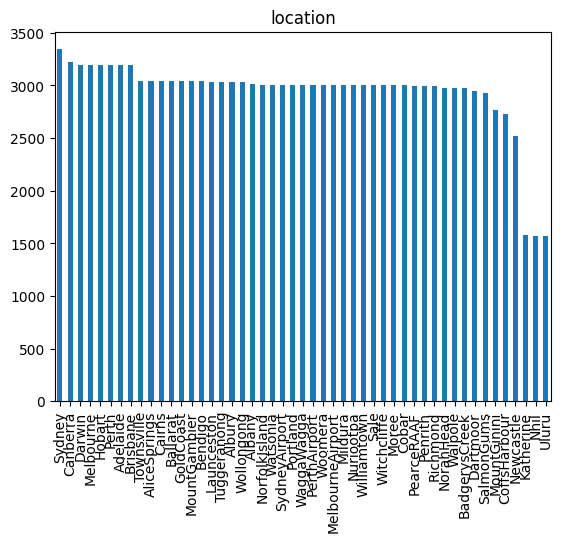

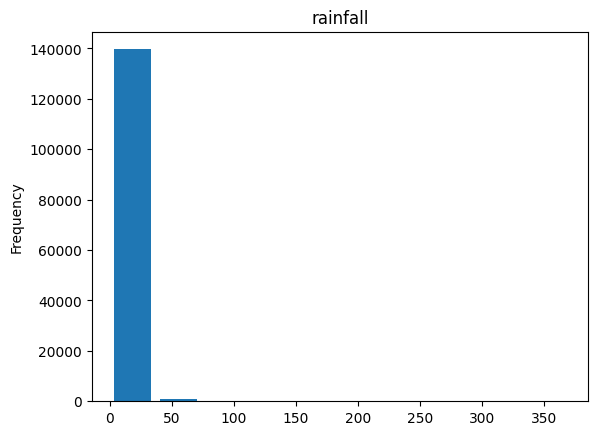

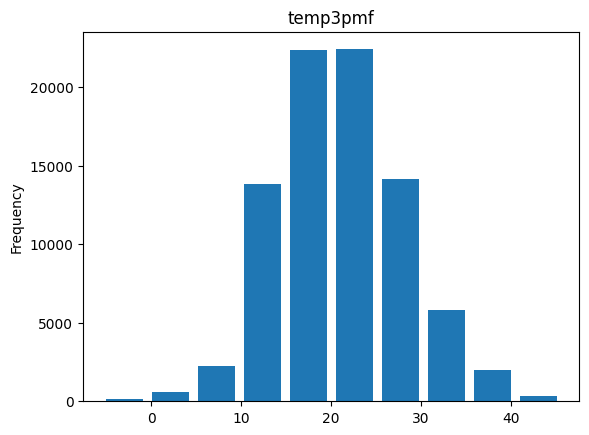

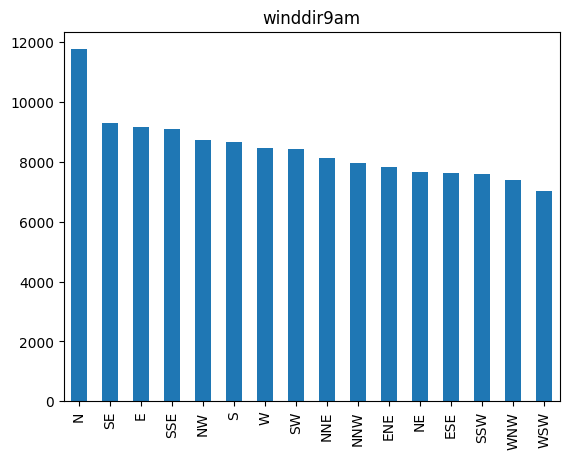

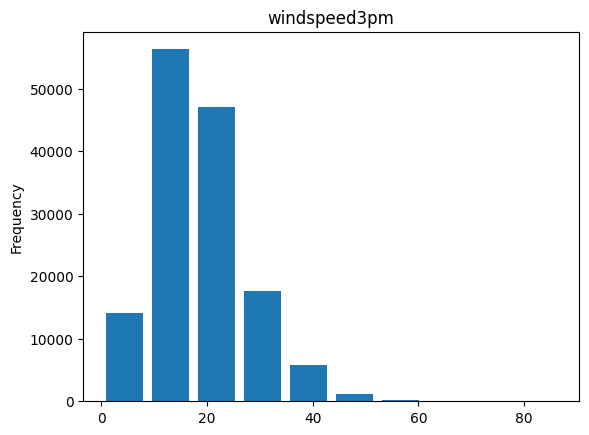

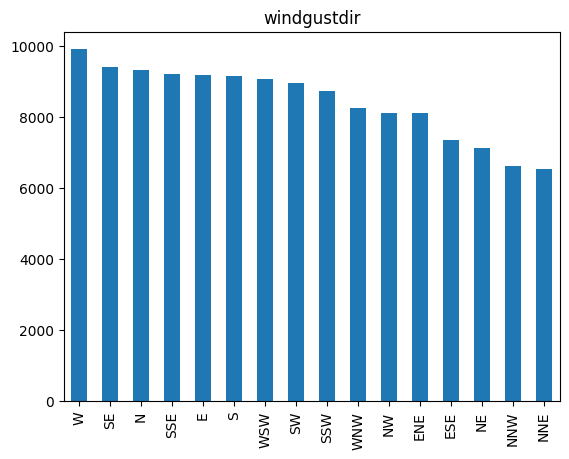

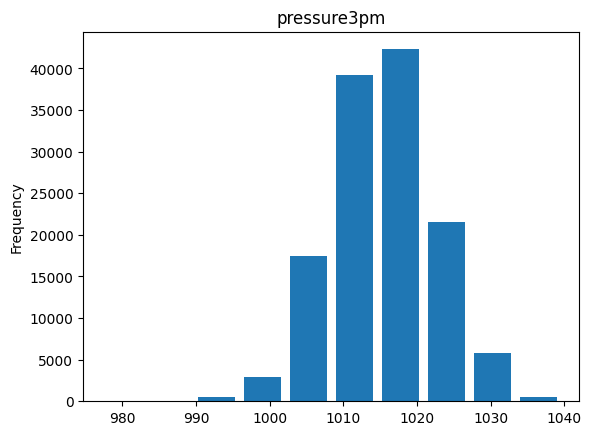

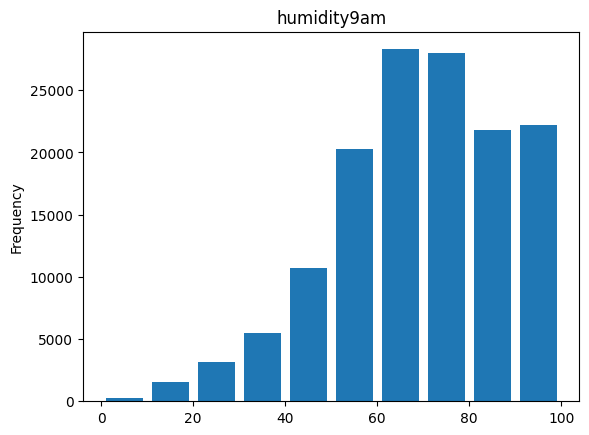

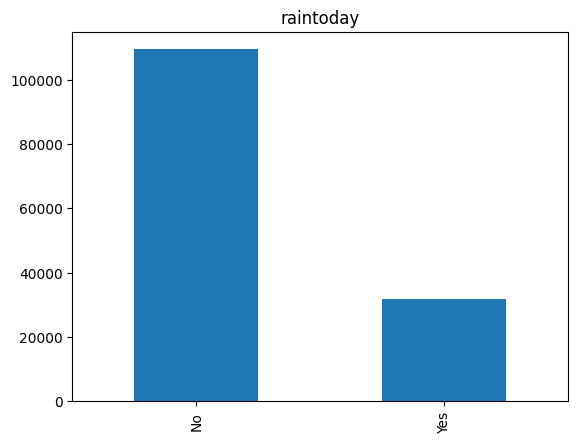

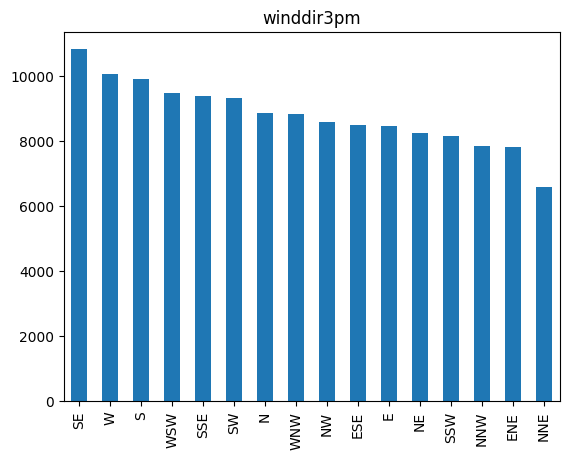

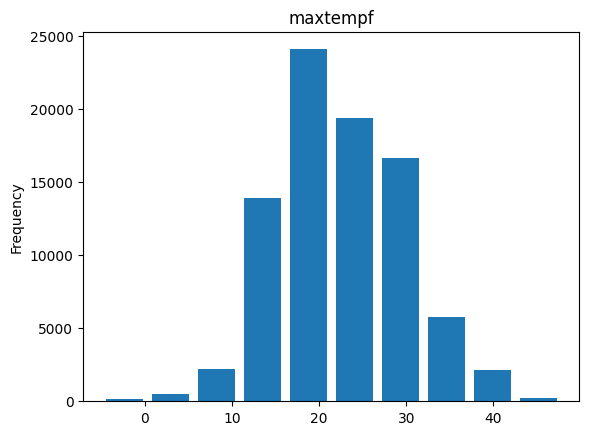

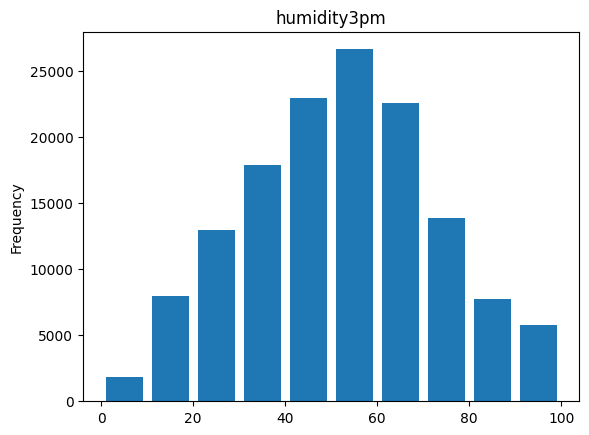

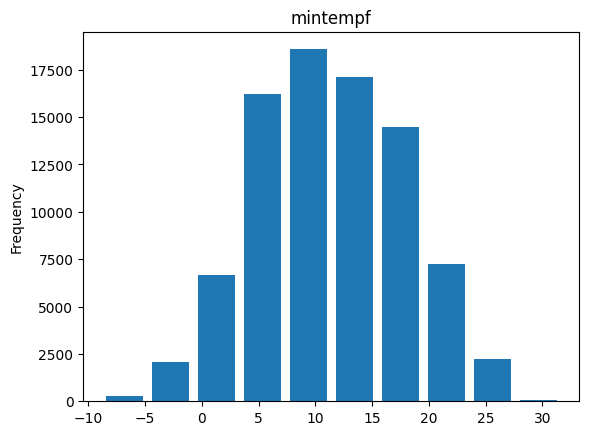

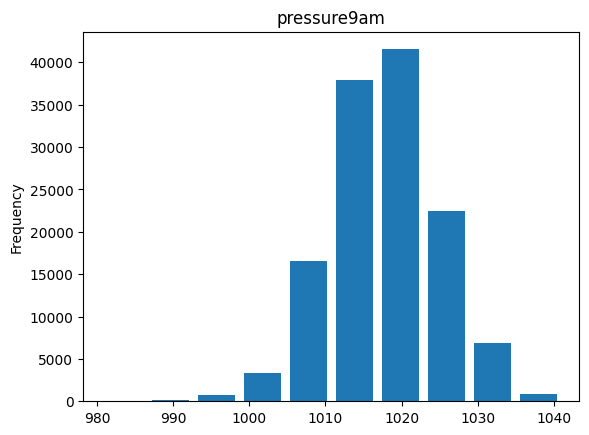

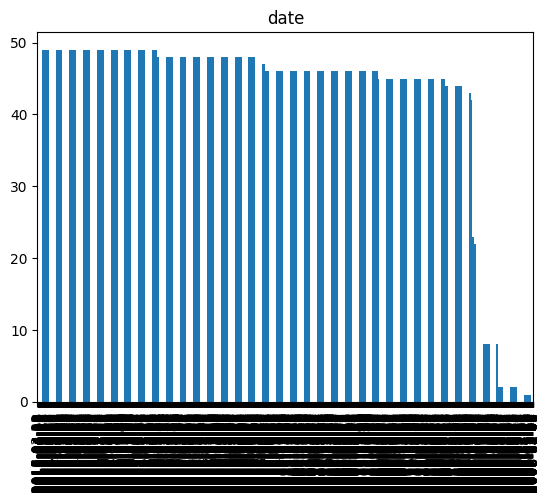

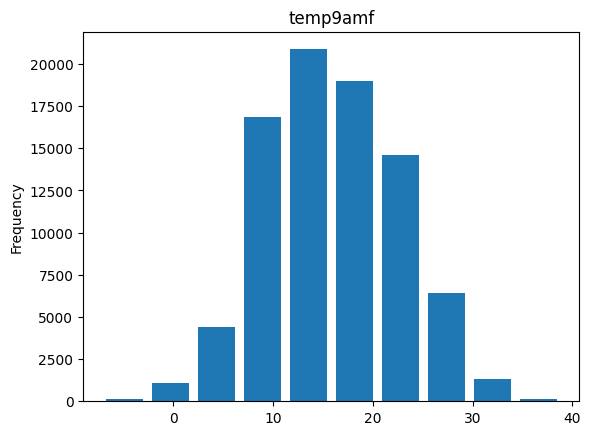

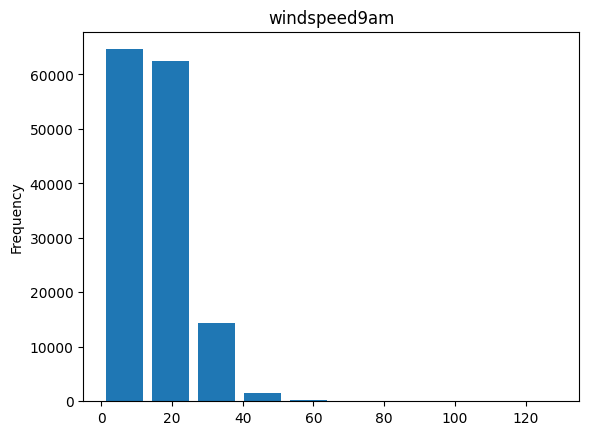

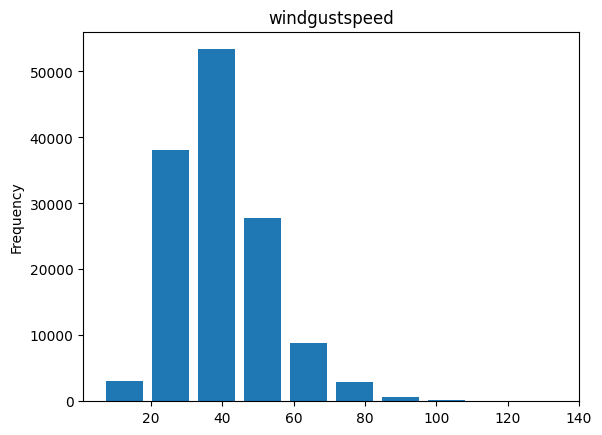

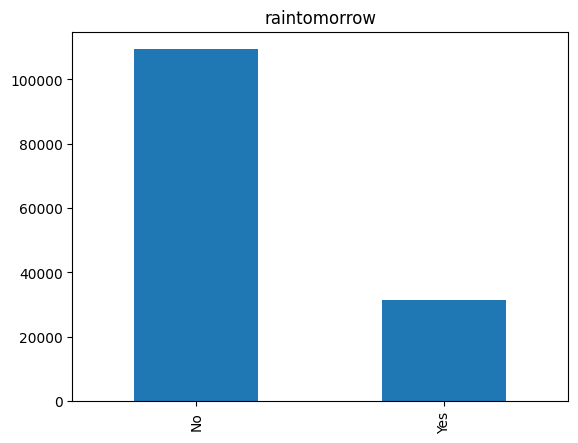

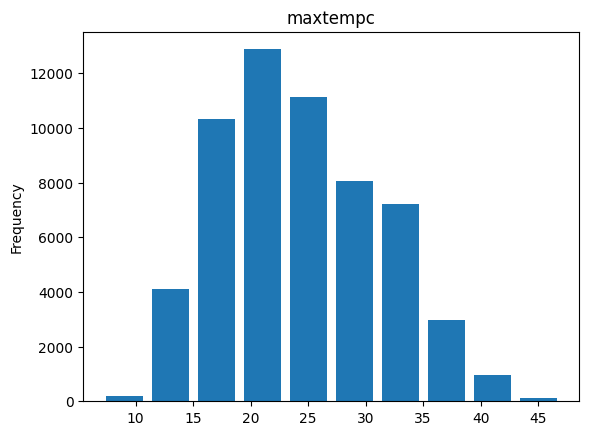

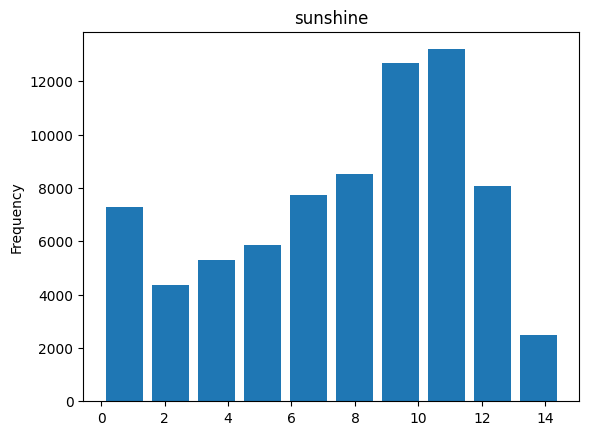

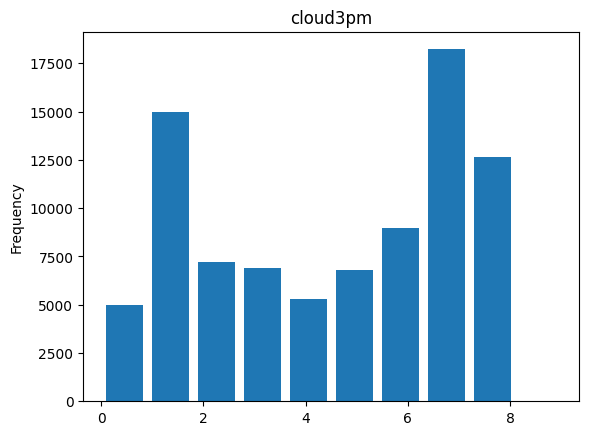

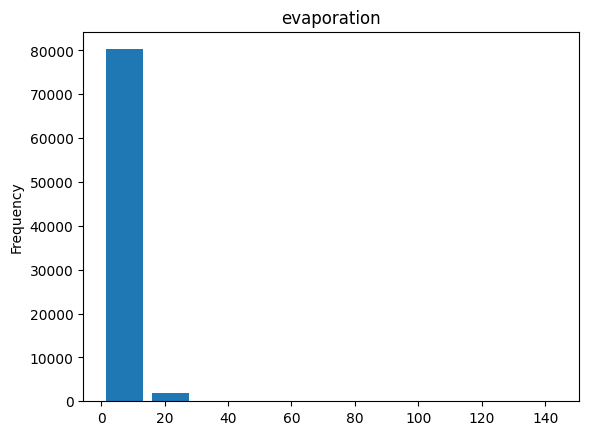

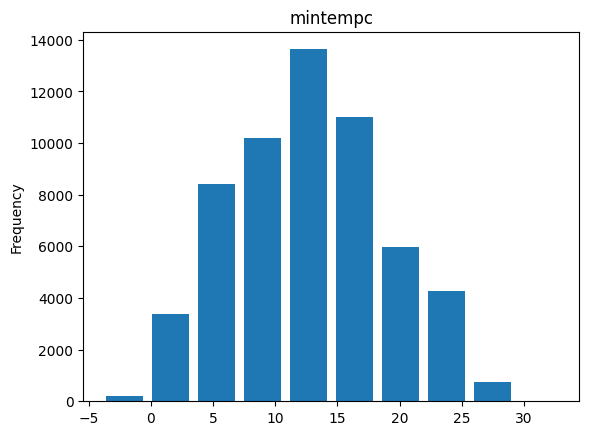

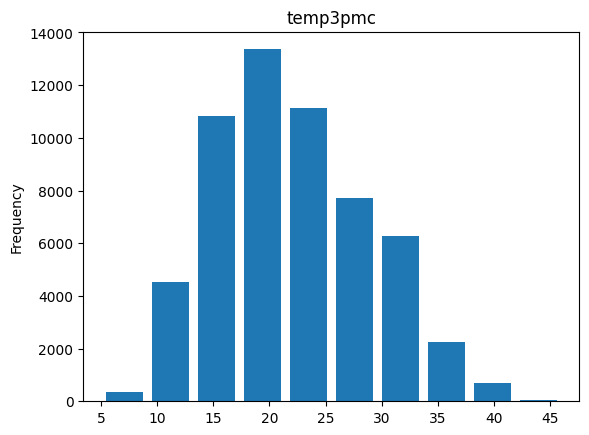

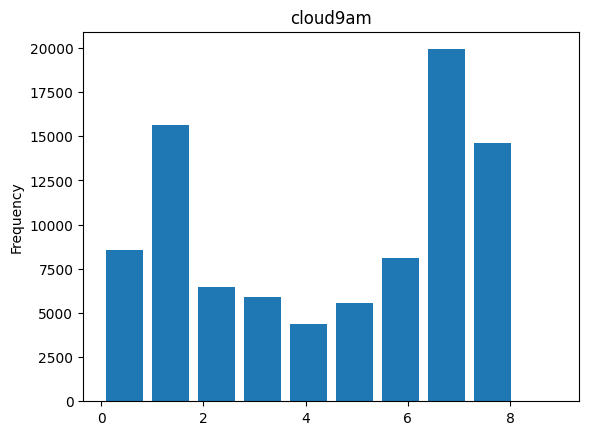

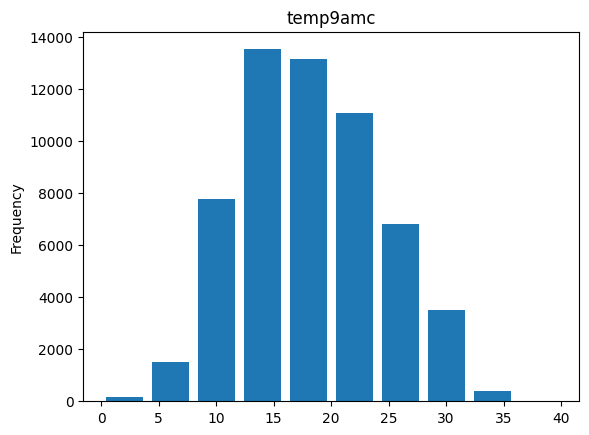

In [21]:
import matplotlib.pyplot as plt
import pandas as pd

for column in df.columns:
    if df[column].dtype.name == 'category':
        df[column].value_counts().plot(kind='bar', title=column)
    else:
        df[column].plot(kind='hist', rwidth=0.8, title=column)
    plt.show()


<ipython-input-22-a09d4cec7b5c>:9: RuntimeWarning: Mean of empty slice
  df['avg_maxtemp'] = df[maxtemp_cols].apply(lambda row: np.nanmean(row), axis=1)
<ipython-input-22-a09d4cec7b5c>:10: RuntimeWarning: Mean of empty slice
  df['avg_mintemp'] = df[mintemp_cols].apply(lambda row: np.nanmean(row), axis=1)
<ipython-input-22-a09d4cec7b5c>:17: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('coolwarm')
<ipython-input-22-a09d4cec7b5c>:34: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  plt.colorbar(cm.ScalarMappable(norm=norm, cmap=cmap), label='Temperature (°C)')


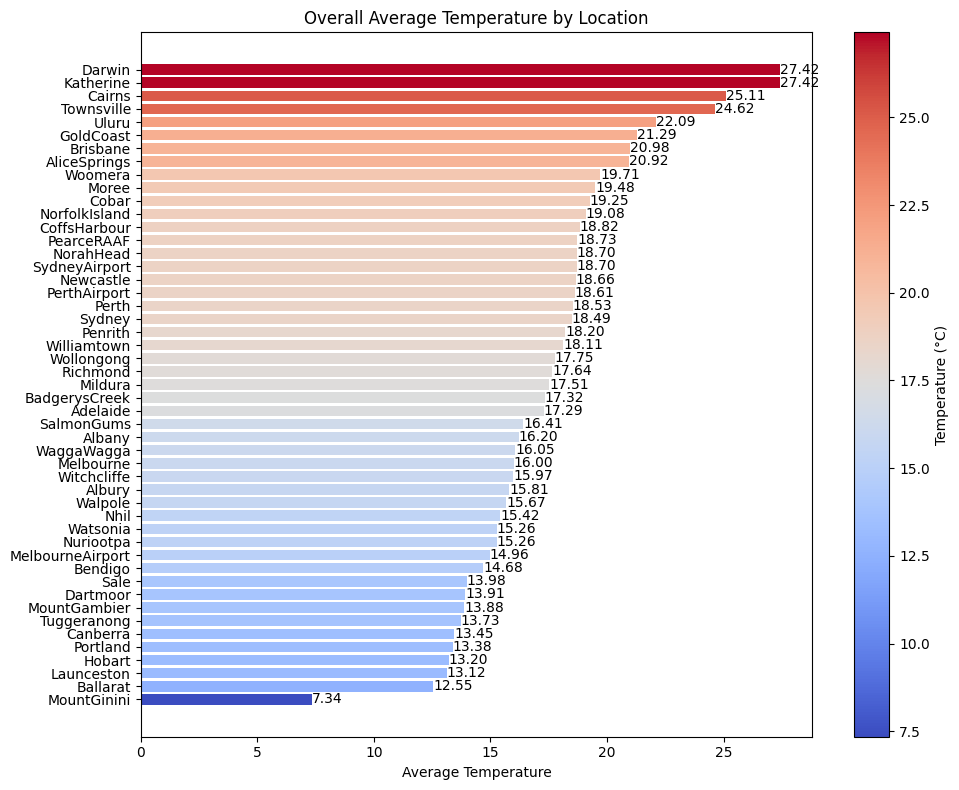

            location   avg_temp
23       MountGinini   7.344151
5           Ballarat  12.546814
17        Launceston  13.121501
15            Hobart  13.200665
33          Portland  13.381854
9           Canberra  13.448098
40       Tuggeranong  13.728133
22      MountGambier  13.881995
12          Dartmoor  13.905678
35              Sale  13.982873
6            Bendigo  14.680217
19  MelbourneAirport  14.963628
28         Nuriootpa  15.259401
44          Watsonia  15.261623
25              Nhil  15.422582
43           Walpole  15.672773
2             Albury  15.811543
46       Witchcliffe  15.971391
18         Melbourne  16.001249
42        WaggaWagga  16.052029
1             Albany  16.203796
36        SalmonGums  16.406111
0           Adelaide  17.291980
4      BadgerysCreek  17.322596
20           Mildura  17.510524
34          Richmond  17.643402
47        Wollongong  17.753219
45       Williamtown  18.113918
30           Penrith  18.199833
37            Sydney  18.488633
31      

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.cm as cm

maxtemp_cols = [col for col in df.columns if 'maxtemp' in col.lower() and not df[col].isna().all()]
mintemp_cols = [col for col in df.columns if 'mintemp' in col.lower() and not df[col].isna().all()]

df['avg_maxtemp'] = df[maxtemp_cols].apply(lambda row: np.nanmean(row), axis=1)
df['avg_mintemp'] = df[mintemp_cols].apply(lambda row: np.nanmean(row), axis=1)

df['avg_temp'] = df[['avg_maxtemp', 'avg_mintemp']].mean(axis=1)

location_avg_temp = df.groupby('location')['avg_temp'].mean().reset_index()

location_avg_temp_sorted = location_avg_temp.sort_values(by='avg_temp', ascending=True)
cmap = cm.get_cmap('coolwarm')

norm = plt.Normalize(location_avg_temp_sorted['avg_temp'].min(), location_avg_temp_sorted['avg_temp'].max())

colors = cmap(norm(location_avg_temp_sorted['avg_temp'].values))

plt.figure(figsize=(10, 8))
bars = plt.barh(location_avg_temp_sorted['location'], location_avg_temp_sorted['avg_temp'], color=colors)
plt.xlabel('Average Temperature')
plt.title('Overall Average Temperature by Location')
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

for bar, value in zip(bars, location_avg_temp_sorted['avg_temp']):
    plt.text(bar.get_width(), bar.get_y() + bar.get_height() / 2,
             f'{value:.2f}', va='center', ha='left')

plt.colorbar(cm.ScalarMappable(norm=norm, cmap=cmap), label='Temperature (°C)')

plt.tight_layout()
plt.show()

print(location_avg_temp_sorted)

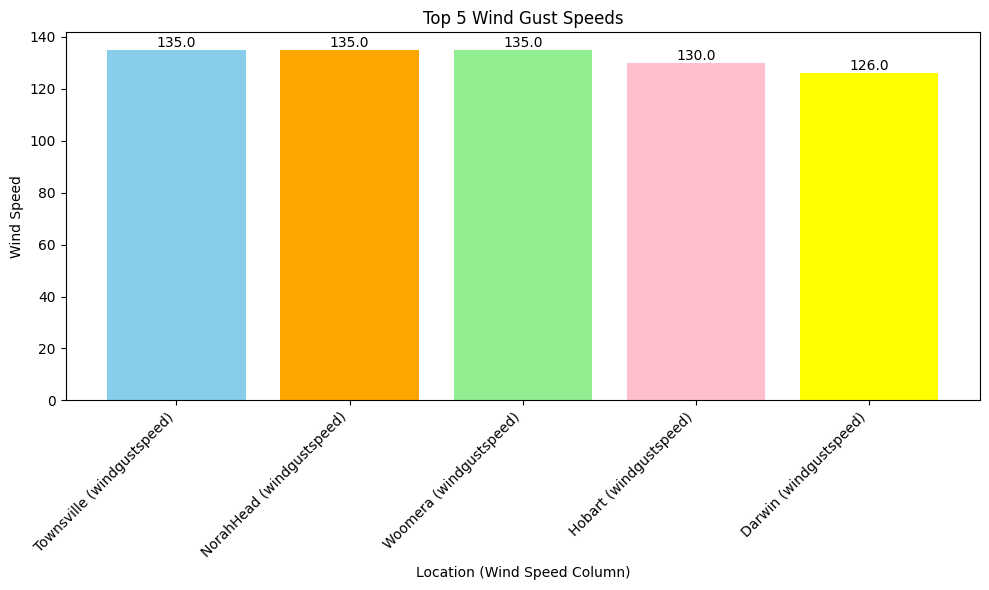

In [24]:
if 'windgustspeed' in df.columns:
    wind_speeds_long = df[['location', 'windgustspeed']].copy()
    wind_speeds_long.rename(columns={'windgustspeed': 'SpeedValue'}, inplace=True)
    wind_speeds_long['WindSpeedCol'] = 'windgustspeed'

    top_5_speeds = wind_speeds_long.sort_values(by='SpeedValue', ascending=False).head(5)

    plt.figure(figsize=(10, 6))
    colors = ['skyblue', 'orange', 'lightgreen', 'pink', 'yellow']

    bars = plt.bar([f"{row['location']} ({row['WindSpeedCol']})" for index, row in top_5_speeds.iterrows()],
                   top_5_speeds['SpeedValue'],
                   color=[colors[i % len(colors)] for i in range(len(top_5_speeds))])

    plt.xlabel('Location (Wind Speed Column)')
    plt.ylabel('Wind Speed')
    plt.title('Top 5 Wind Gust Speeds')

    plt.xticks(rotation=45, ha="right")

    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width() / 2.0, height, f'{height}', ha='center', va='bottom')

    plt.tight_layout()
    plt.show()
else:
    print("The 'windgustspeed' column does not exist in the DataFrame.")


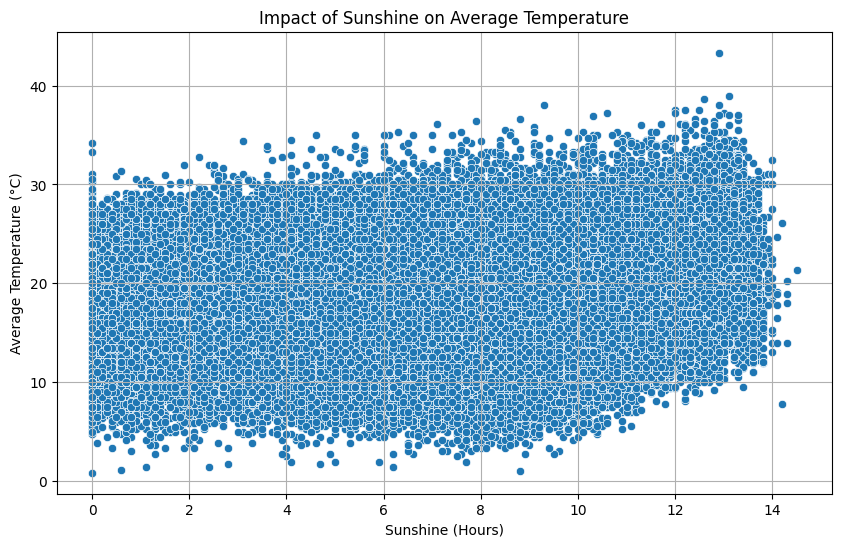

<ipython-input-27-20cbf4b6f471>:11: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


,rainfall,temp3pmf,windspeed3pm,pressure3pm,humidity9am,maxtempf,humidity3pm,mintempf,pressure9am,temp9amf,...,sunshine,cloud3pm,evaporation,mintempc,temp3pmc,cloud9am,temp9amc,avg_maxtemp,avg_mintemp,avg_temp
rainfall,1.000000,-0.071414,0.057887,-0.126548,0.223918,-0.069287,0.255379,0.107409,-0.168154,0.021628,...,-0.227546,0.172407,-0.064330,0.097056,-0.096295,0.198402,-0.008919,-0.075070,0.103929,0.010317
temp3pmf,-0.071414,1.000000,0.061835,-0.361844,-0.505558,0.985661,-0.556331,0.713673,-0.266823,0.857489,...,0.492123,-0.308168,0.582740,NaN,NaN,-0.295343,NaN,0.985661,0.713673,0.917088
windspeed3pm,0.057887,0.061835,1.000000,-0.255487,-0.145496,0.084983,0.016662,0.220104,-0.296381,0.211486,...,0.053869,0.025384,0.129458,0.107425,-0.026999,0.053337,0.089329,0.050272,0.175458,0.116385
pressure3pm,-0.126548,-0.361844,-0.255487,1.000000,0.186879,-0.393637,0.051989,-0.438189,0.961327,-0.446175,...,-0.019699,-0.084767,-0.293554,-0.501736,-0.433615,-0.060770,-0.513590,-0.427168,-0.461595,-0.476366
humidity9am,0.223918,-0.505558,-0.145496,0.186879,1.000000,-0.513845,0.667476,-0.265932,0.139463,-0.488465,...,-0.490818,0.357322,-0.504162,-0.163678,-0.477741,0.452929,-0.431097,-0.504774,-0.233606,-0.403518
maxtempf,-0.069287,0.985661,0.084983,-0.393637,-0.513845,1.000000,-0.511981,0.738645,-0.306853,0.880607,...,0.472943,-0.271441,0.598676,NaN,NaN,-0.280675,NaN,1.000000,0.738645,0.938587
humidity3pm,0.255379,-0.556331,0.016662,0.051989,0.667476,-0.511981,1.000000,0.000746,-0.027527,-0.215329,...,-0.629103,0.523117,-0.390084,0.019844,-0.562774,0.517143,-0.231359,-0.509334,0.005869,-0.284519
mintempf,0.107409,0.713673,0.220104,-0.438189,-0.265932,0.738645,0.000746,1.000000,-0.436559,0.910442,...,0.069024,0.022873,0.473701,NaN,NaN,0.086375,NaN,0.738645,1.000000,0.924250
pressure9am,-0.168154,-0.266823,-0.296381,0.961327,0.139463,-0.306853,-0.027527,-0.436559,1.000000,-0.406697,...,0.042020,-0.147882,-0.270317,-0.477861,-0.318453,-0.129797,-0.452735,-0.332016,-0.451140,-0.417332
temp9amf,0.021628,0.857489,0.211486,-0.446175,-0.488465,0.880607,-0.215329,0.910442,-0.406697,1.000000,...,0.278582,-0.116396,0.556370,NaN,NaN,-0.124154,NaN,0.880607,0.910442,0.958320


In [27]:
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.scatterplot(x='sunshine', y='avg_temp', data=df)
plt.title('Impact of Sunshine on Average Temperature')
plt.xlabel('Sunshine (Hours)')
plt.ylabel('Average Temperature (°C)')
plt.grid(True)
plt.show()

correlation_matrix = df.corr()
correlation_matrix

<ipython-input-29-02526daa9466>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


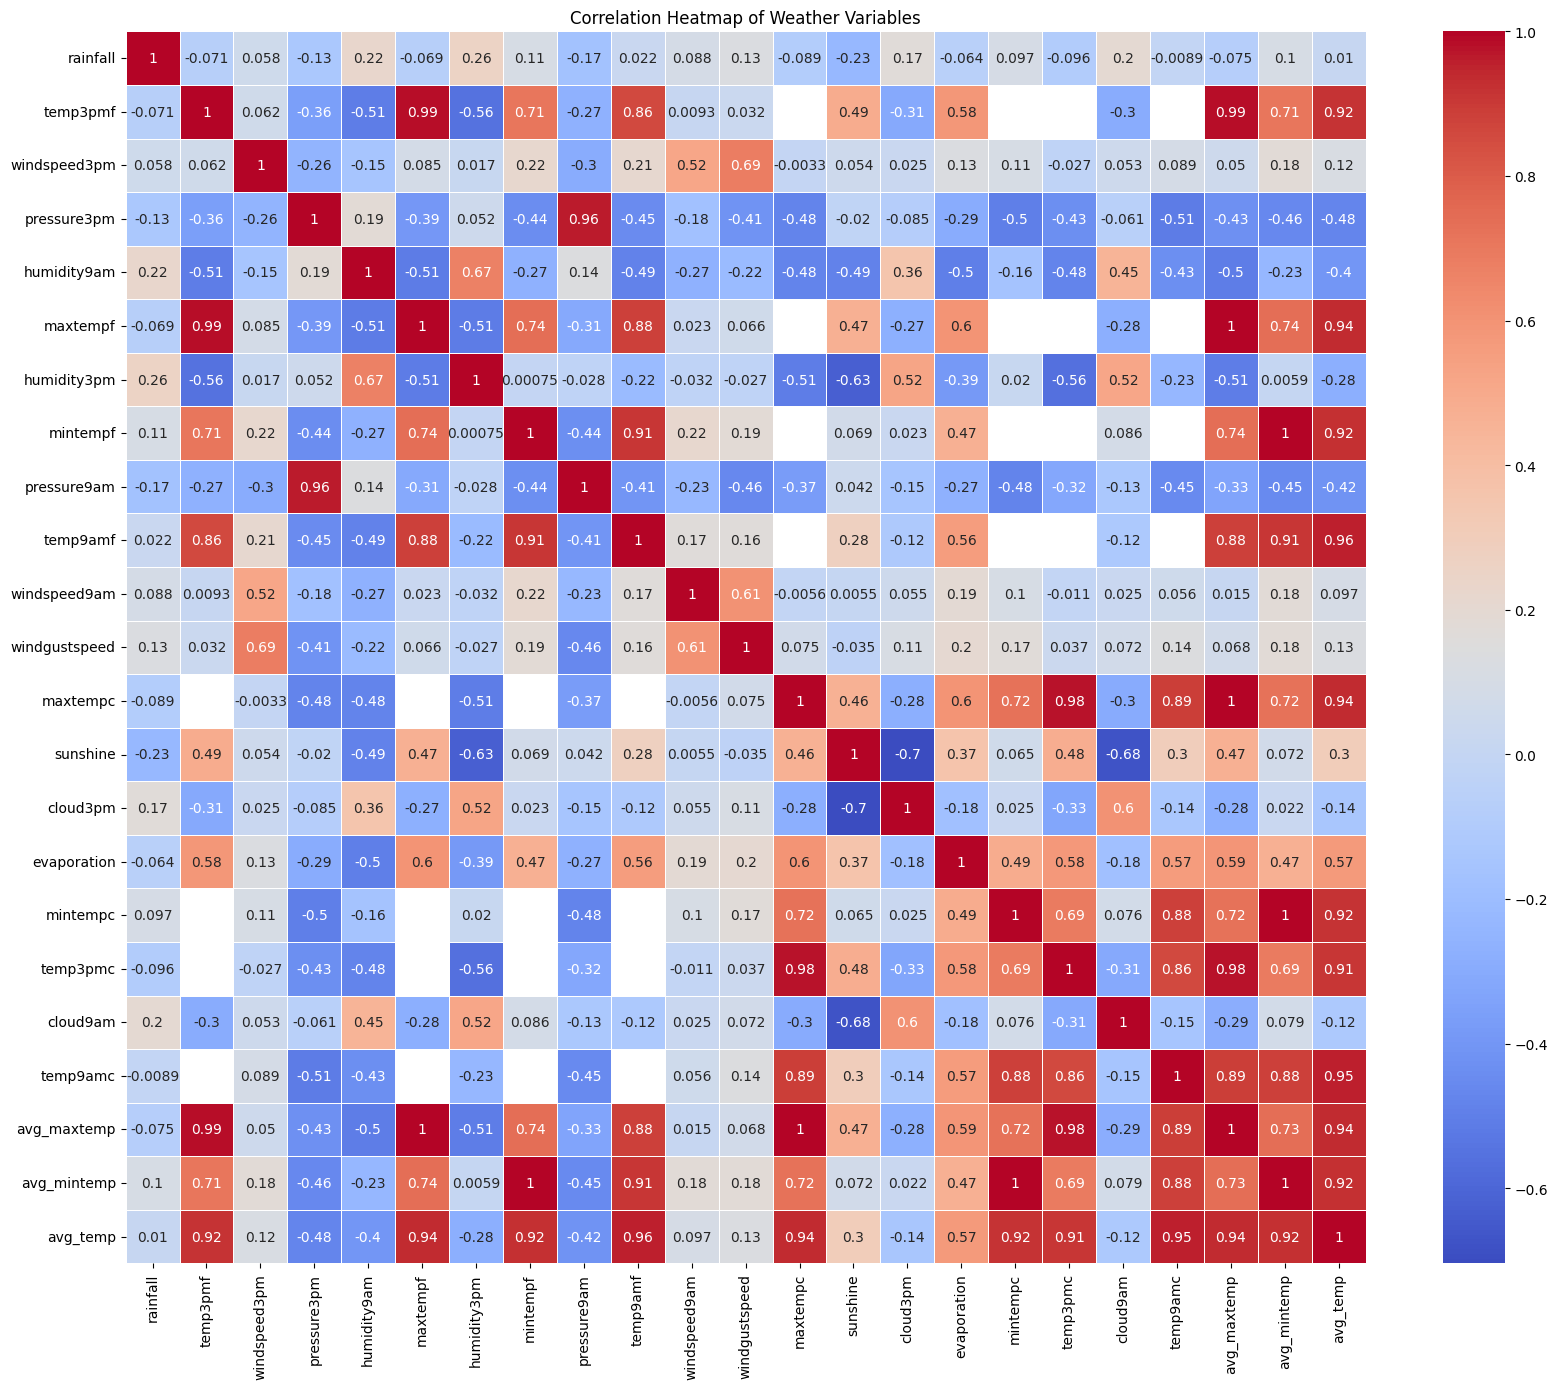

In [29]:
correlation_matrix = df.corr()

plt.figure(figsize=(20, 16))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Heatmap of Weather Variables')
plt.show()


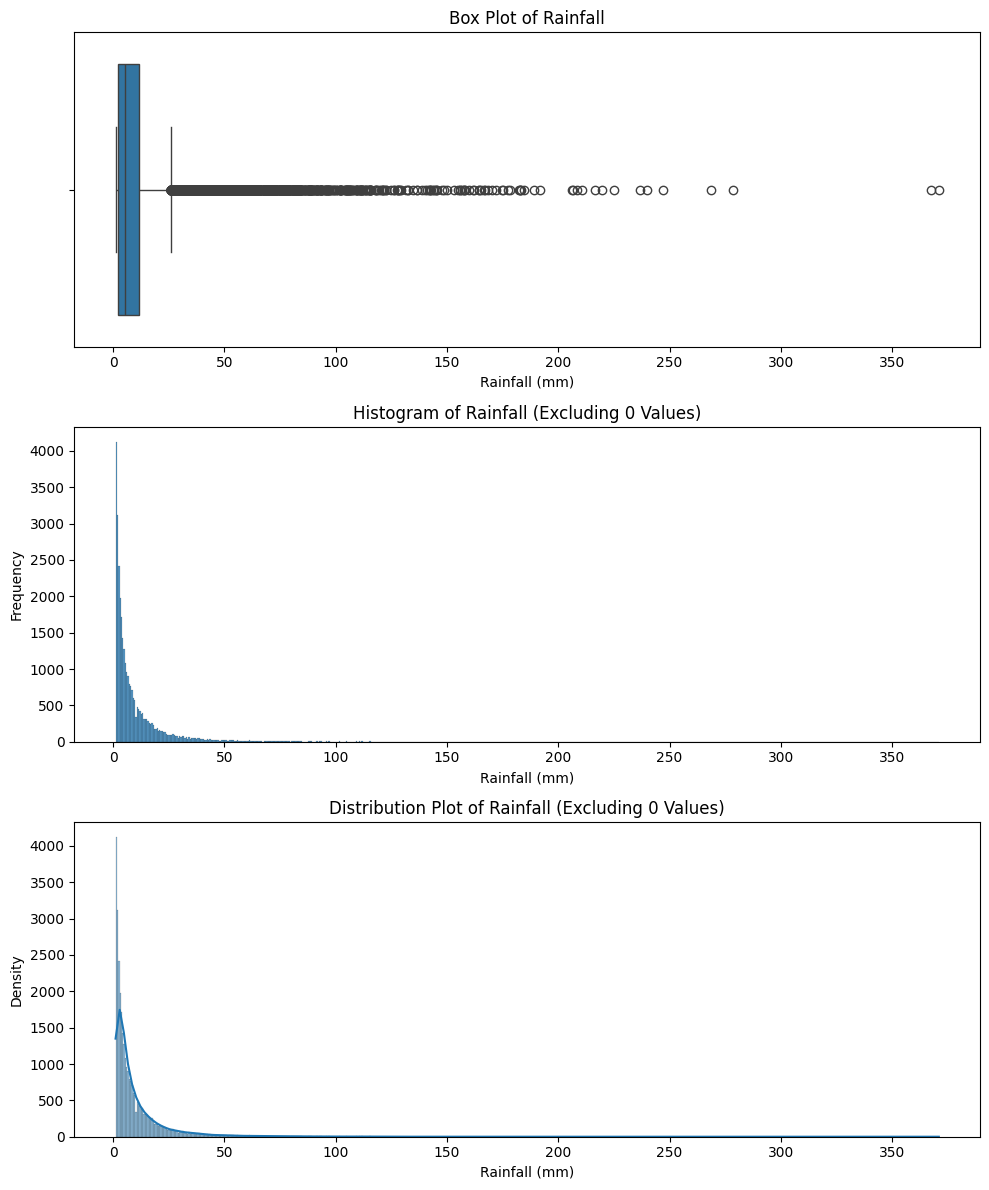

count    31626.000000
mean        10.250079
std         15.458250
min          1.100000
25%          2.400000
50%          5.200000
75%         11.800000
max        371.000000
Name: rainfall, dtype: float64

In [34]:
df_large_nonzero = df[df['rainfall'] > 1]

rainfall_nonzero_descriptive = df_large_nonzero['rainfall'].describe()

fig, axs = plt.subplots(3, 1, figsize=(10, 12))

sns.boxplot(x=df_large_nonzero['rainfall'], ax=axs[0])
axs[0].set_title('Box Plot of Rainfall')
axs[0].set_xlabel('Rainfall (mm)')

sns.histplot(df_large_nonzero['rainfall'], kde=False, ax=axs[1])
axs[1].set_title('Histogram of Rainfall (Excluding 0 Values)')
axs[1].set_xlabel('Rainfall (mm)')
axs[1].set_ylabel('Frequency')

sns.histplot(df_large_nonzero['rainfall'], kde=True, ax=axs[2])
axs[2].set_title('Distribution Plot of Rainfall (Excluding 0 Values)')
axs[2].set_xlabel('Rainfall (mm)')
axs[2].set_ylabel('Density')

plt.tight_layout()
plt.show()

rainfall_nonzero_descriptive



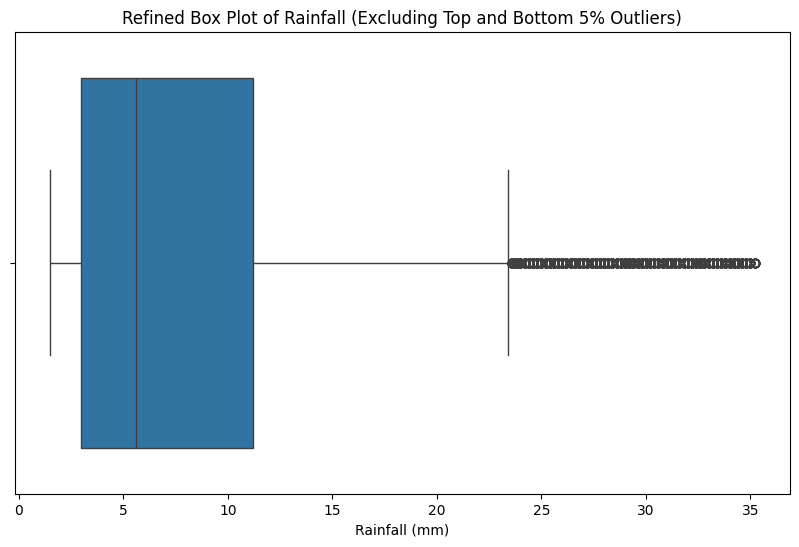

In [35]:
rainfall_refined = df_large_nonzero['rainfall'].quantile([0.05, 0.95])

df_large_refined = df_large_nonzero[(df_large_nonzero['rainfall'] > rainfall_refined.loc[0.05]) & (df_large_nonzero['rainfall'] < rainfall_refined.loc[0.95])]

plt.figure(figsize=(10, 6))
sns.boxplot(x=df_large_refined['rainfall'])
plt.title('Refined Box Plot of Rainfall (Excluding Top and Bottom 5% Outliers)')
plt.xlabel('Rainfall (mm)')
plt.show()

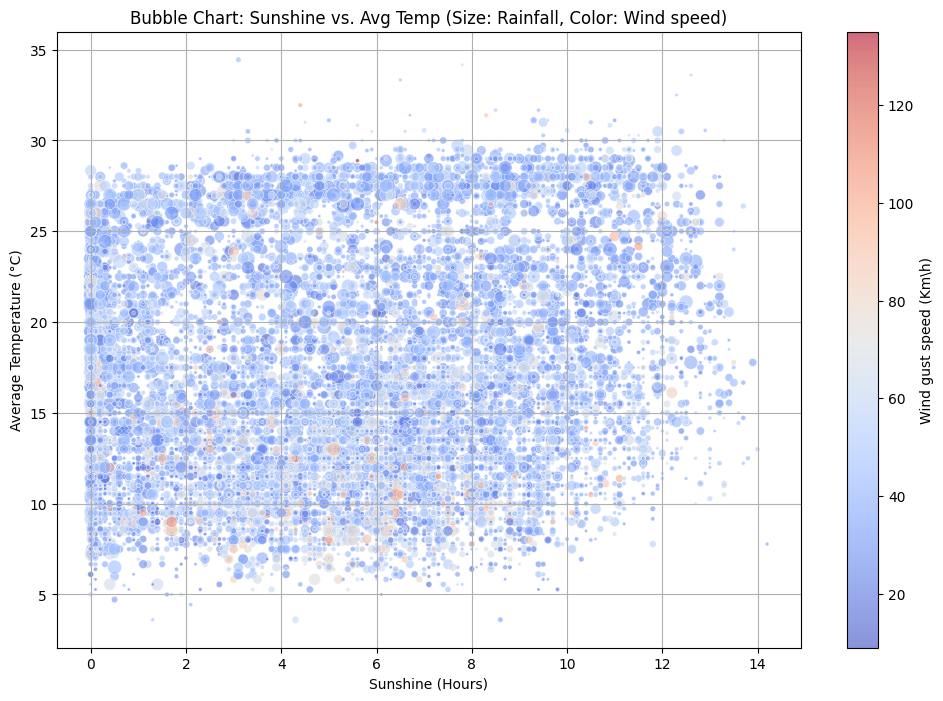

In [38]:
df_plot = df_large_nonzero[(df_large_nonzero['rainfall'] > df_large_nonzero['rainfall'].quantile(0.05)) &
                   (df_large_nonzero['rainfall'] < df_large_nonzero['rainfall'].quantile(0.95))]

plt.figure(figsize=(12, 8))
plt.scatter(df_plot['sunshine'], df_plot['avg_temp'],
            s=df_plot['rainfall']*3,
            c=df_plot['windgustspeed'], cmap='coolwarm', alpha=0.6, edgecolors="w", linewidth=0.5)
plt.title('Bubble Chart: Sunshine vs. Avg Temp (Size: Rainfall, Color: Wind speed)')
plt.xlabel('Sunshine (Hours)')
plt.ylabel('Average Temperature (°C)')
plt.colorbar(label='Wind gust speed (Km\h)')
plt.grid(True)
plt.show()

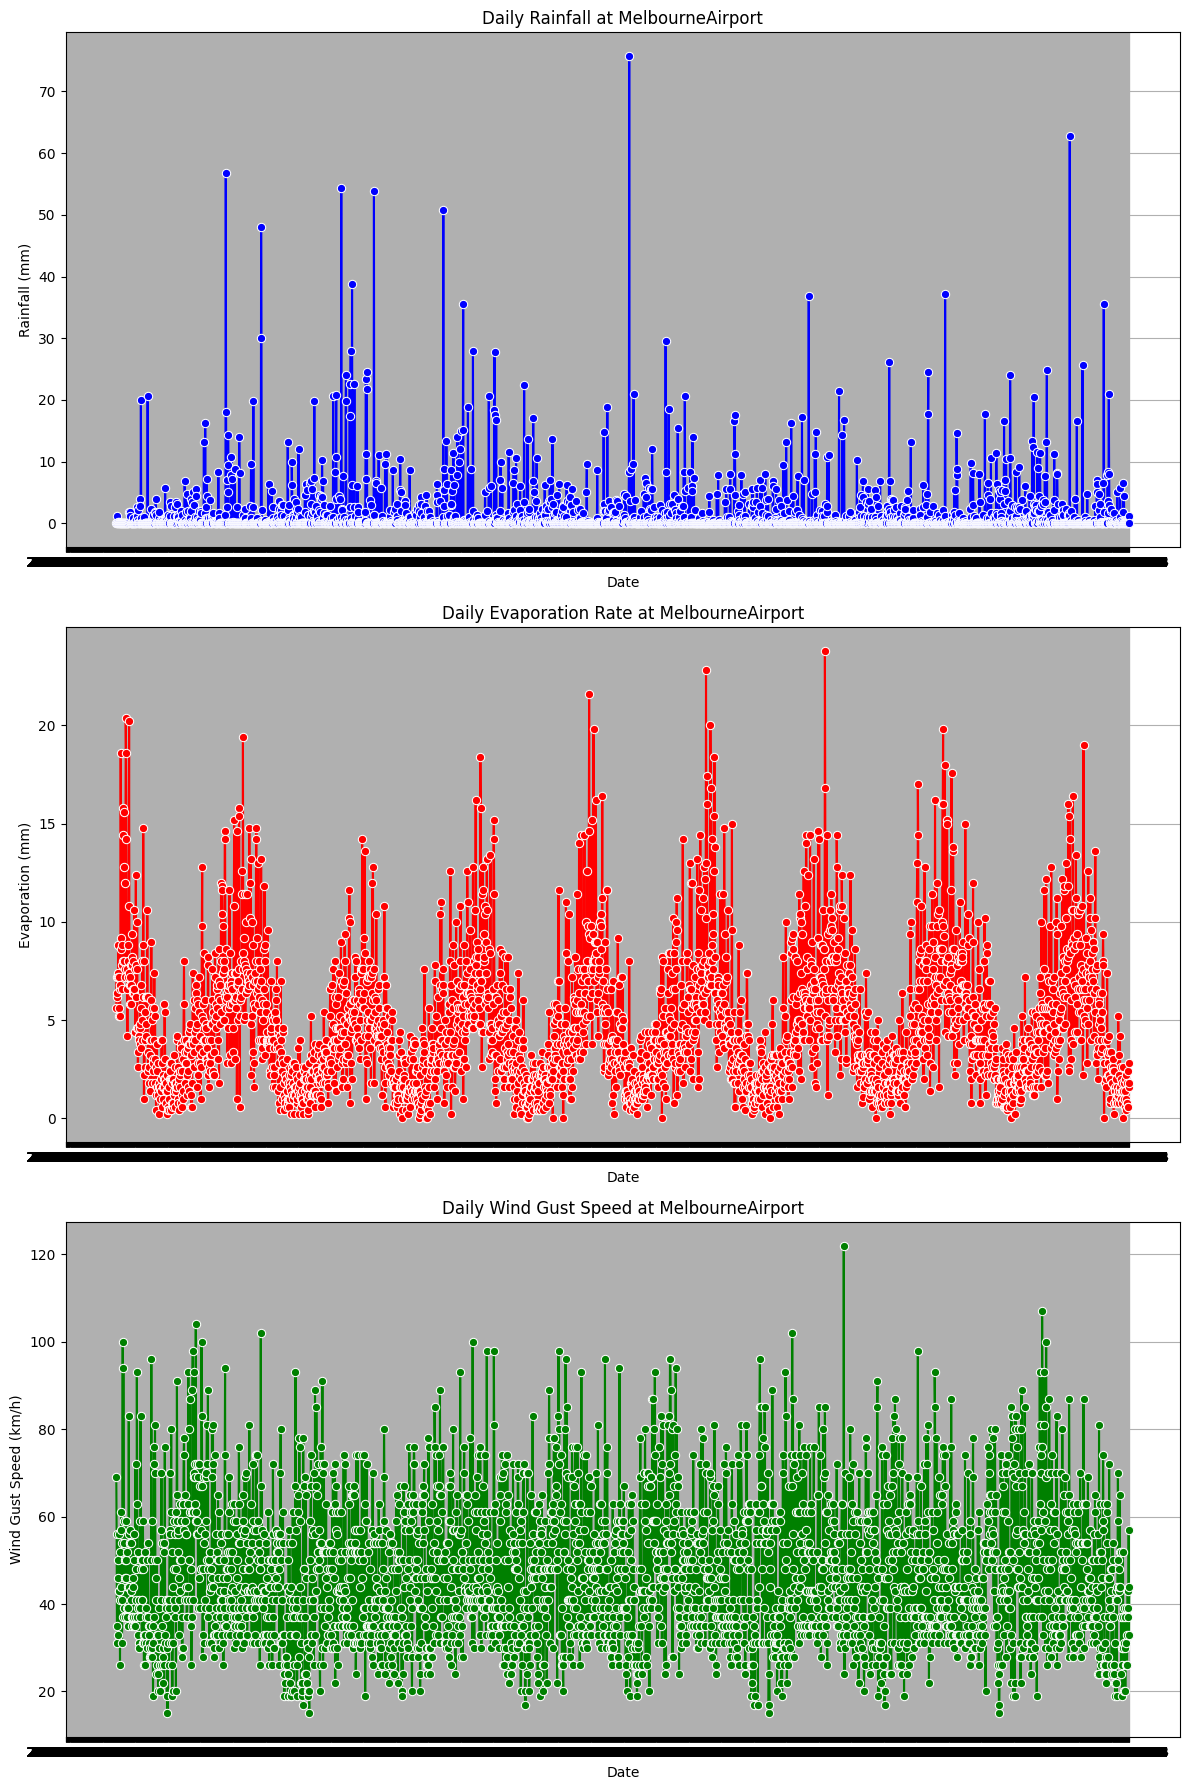

In [42]:
location_to_analyze = df['location'].unique()[15]

df_filtered = df[df['location'] == location_to_analyze]

fig, axs = plt.subplots(3, 1, figsize=(12, 18))

sns.lineplot(x='date', y='rainfall', data=df_filtered, ax=axs[0], marker='o', color='blue')
axs[0].set_title(f'Daily Rainfall at {location_to_analyze}')
axs[0].set_xlabel('Date')
axs[0].set_ylabel('Rainfall (mm)')
axs[0].grid(True)

sns.lineplot(x='date', y='evaporation', data=df_filtered, ax=axs[1], marker='o', color='red')
axs[1].set_title(f'Daily Evaporation Rate at {location_to_analyze}')
axs[1].set_xlabel('Date')
axs[1].set_ylabel('Evaporation (mm)')
axs[1].grid(True)

sns.lineplot(x='date', y='windgustspeed', data=df_filtered, ax=axs[2], marker='o', color='green')
axs[2].set_title(f'Daily Wind Gust Speed at {location_to_analyze}')
axs[2].set_xlabel('Date')
axs[2].set_ylabel('Wind Gust Speed (km/h)')
axs[2].grid(True)

plt.tight_layout()
plt.show()


In [50]:
quantiles = df['avg_temp'].quantile([0.1, 0.3, 0.7, 0.9])

def categorize_temperature_adjusted(temp):
    if temp <= quantiles[0.1]:
        return 'Very cold days'
    elif temp <= quantiles[0.3]:
        return 'Cold days'
    elif temp <= quantiles[0.7]:
        return 'Moderate days'
    elif temp <= quantiles[0.9]:
        return 'Warm days'
    else:
        return 'Very warm days'

df['Temperature Category'] = df['avg_temp'].apply(categorize_temperature_adjusted)

category_counts = df.groupby(['location', 'Temperature Category']).size().unstack(fill_value=0)
highest_days_by_category = category_counts.idxmax()

highest_days_by_category


Temperature Category
Cold days              Portland
Moderate days     NorfolkIsland
Very cold days      MountGinini
Very warm days           Darwin
Warm days                Cairns
dtype: object